# BERT Topic Modeling of Survey Measurements of Masculinity

Purpose: Employ BERT, a topic modeling algorithm, to automatically cluster text data into particular topics. In this particular example, I am analyzing the common topics/themes of ~500 survey questions from surveys that measure masculinity. 

Topic Modeling Information: https://maartengr.github.io/BERTopic/index.html

## Imports and Setup

In [137]:
from bertopic import BERTopic
import pandas as pd

In [171]:
df = pd.read_csv('../Data/Questions_Final.csv')

# Comment the following line if evaluating more than the CMNI
df = df[df["Scale"] == "Conformity to Masculine Norms Inventory"]

print(df.shape)
df.head()
# Put reviews in a list
docs = df['Question Text'].to_list()

(94, 7)


## Implement BERT

In [162]:
# Select model (in this case, the all-MiniLM-L6-v2 model is most commonly used 
model_name = "all-MiniLM-L6-v2"

# topic_model = BERTopic(embedding_model=model_name)

# Removing stop words?
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_model = CountVectorizer(stop_words="english")
topic_model = BERTopic(vectorizer_model=vectorizer_model, nr_topics='auto')

# Removing stop words pt. 2
# from bertopic.vectorizers import ClassTfidfTransformer

# ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
# topic_model = BERTopic(ctfidf_model=ctfidf_model)

In [163]:
topics, probs = topic_model.fit_transform(docs)

In [164]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,29,-1_gay_thought_help_win,"[gay, thought, help, win, violence, ask, winni...","[Being thought of as gay is not a bad thing, I..."
1,0,33,0_feelings_women_men_sex,"[feelings, women, men, sex, emotional, person,...",[Men and women should respect each other as eq...
2,1,18,1_risks_situations_risky_necessary,"[risks, situations, risky, necessary, taking, ...","[I enjoy taking risks, In general‚ I do not li..."
3,2,14,2_work_important_attention_priority,"[work, important, attention, priority, life, g...","[I feel good when work is my first priority, W..."


In [165]:
# Example Topic:
topic_model.get_topic(8)

False

In [166]:
# Example Topic Questions:
topic_model.get_representative_docs(4)

In [167]:
df = pd.DataFrame({"topic": topics, "document": docs})
df.head()

,topic,document
0,0,It is best to keep your emotions hidden
1,-1,In general‚ I will do anything to win
2,0,If I could‚ I would frequently change sexual p...
3,-1,If there is going to be violence‚ I find a way...
4,-1,It is important to me that people think I am h...


In [168]:
# Visualize Topics
topic_model.visualize_topics().show()

/Users/jacobrubin/miniconda3/lib/python3.11/site-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning:

k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.



TypeError: Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.

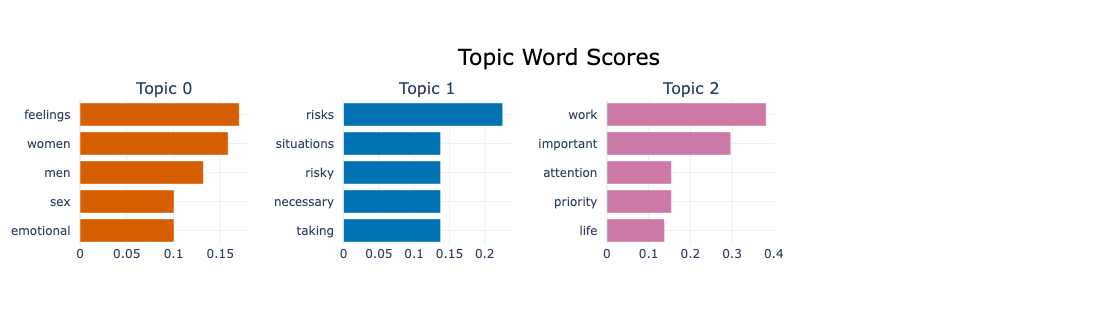

In [172]:
bar_chart = topic_model.visualize_barchart(top_n_topics=10)

# Update filepath as needed
bar_chart.write_image("../Visualizations/CMNI_BERTopic_Bar_Chart.png", width=800, height=600)
bar_chart

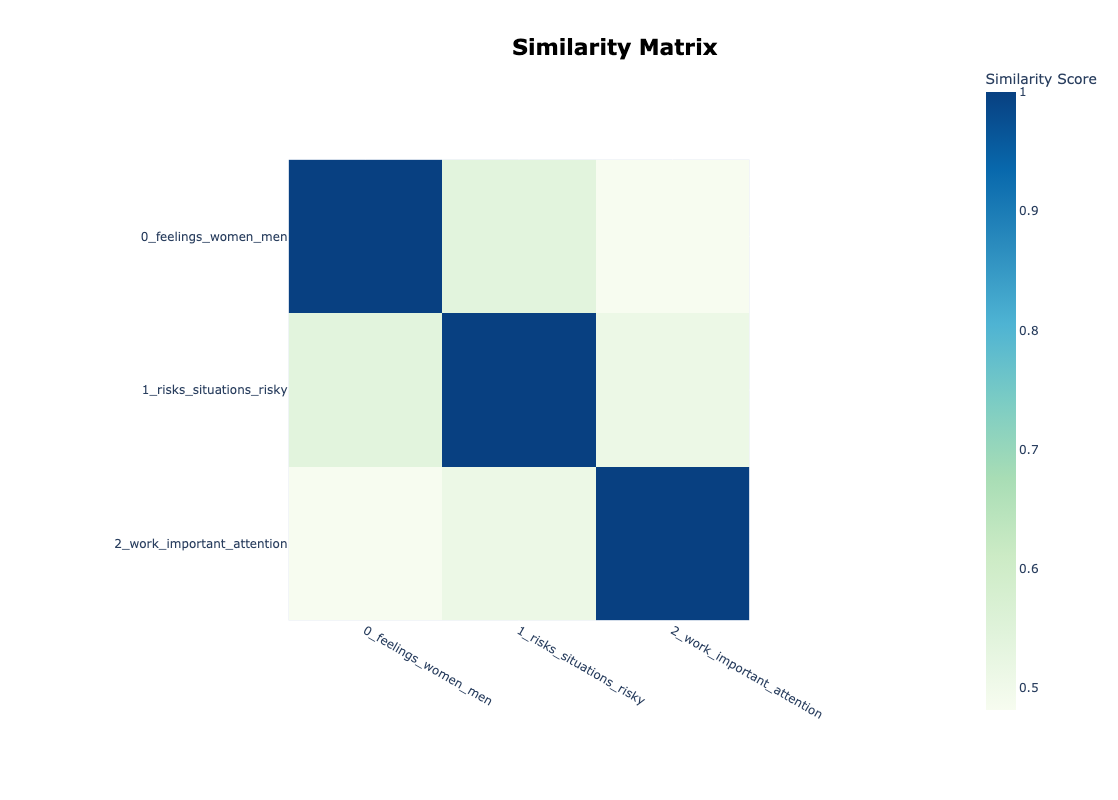

In [170]:
heat_map = topic_model.visualize_heatmap()

# Update filepath as needed
heat_map.write_image("../Visualizations/CMNI_BERTopic_Heat_Map.png", width=800, height=600)
heat_map